<h1> Adults Data Income Prediction </h1>
<p> This dataset is sourced from University of California Irive ML Library </p>
<p> The attributes are given below </p>

 
Dependent Variable : ">50K", ;<=50K"

<h6> Independent Variables </h6>
age: continuous. <br>
workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.<br>
fnlwgt: continuous.<br>
education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.<br>
education-num: continuous.<br>
marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.<br>
occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.<br>
relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.<br>
race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.<br>
sex: Female, Male.<br>
capital-gain: continuous.<br>
capital-loss: continuous.<br>
hours-per-week: continuous.<br>
native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.<br>


<h2> Import the Libraries required </h2>
<p> We intend to apply multiple classification models and then use the best among - Logistic Regression, Decision Tree, Random Forest, Support Vector Machines, Naive Bayes and XGBoost </p>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
import category_encoders as ce
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error,mean_squared_error, roc_auc_score,roc_curve, auc, confusion_matrix, classification_report
import random
import xgboost as xgb

<h2> Read the Data set </h2>

In [3]:
random.seed(100)
np.random.seed(100)
colnames= ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','income']
df = pd.read_csv("Adults/adult.data", names=colnames)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


<h2> Statistical Analysis on the Data Set </h2>

In [4]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [5]:
# Strip white spaces in Data
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

In [6]:
print(df['workclass'].value_counts())

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64


In [7]:
print(df['education'].value_counts())

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64


In [8]:
print(df['marital-status'].value_counts())

Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital-status, dtype: int64


In [9]:
print(df['occupation'].value_counts())

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64


In [10]:
print(df['relationship'].value_counts())

Husband           13193
Not-in-family      8305
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: relationship, dtype: int64


In [11]:
print(df['sex'].value_counts())

Male      21790
Female    10771
Name: sex, dtype: int64


In [12]:
print(df['race'].value_counts())

White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64


In [13]:
print(df['native-country'].value_counts())

United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                      

In [14]:
print(df['income'].value_counts())

<=50K    24720
>50K      7841
Name: income, dtype: int64


The data has missing values and they are identified by '?'. This is present in the following columns
- workclass
- occupation
- native-country

These are categorical variables and in the absence of any information (we can look at imputation, but it is easier to use Mode or Frequency to assume values for missing values.

- workclass : We can assume that the missing values can be replaced by Private as majority of the dataset is for Private.
- occupation: We can assume that the missing value can be replaced by 'Prof-specialty' though 'Craft-repair' is not far behind. It is a judgement call.
- native-country: We can assume United States.

In [16]:
df['workclass'] = df['workclass'].apply(lambda x: 'Private' if x=='?' else x)
print(df['workclass'].value_counts())

Private             24532
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64


In [17]:
df['occupation'] = df['occupation'].apply(lambda x: 'Prof-specialty' if x== '?' else x)
print(df['occupation'].value_counts())

Prof-specialty       5983
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64


In [18]:
#print(df['native-country'].value_counts())
df['native-country'] = df['native-country'].apply(lambda x: 'United-States' if x== '?' else x)
print(df['native-country'].value_counts())

United-States                 29753
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                           29
France                      

So now we have handled missing values in the dataframe, now we need to look at each variable and understand distributions. We shall use seaborn for plotting distributions.


<h4> Workclass </h4>
<p>From the value, it is clear that we have too many factors. Maybe we can combine 'Local-gov','State-gov' and 'Federal-gov' into a single category - 'Government'. For 'Self-emp-not-inc' and 'Self-emp-inc', we can use a single category 'Self-emp' and the 'Without-pay' and 'Never-worked' as 'Unemployed'. </p>

In [ ]:
def fworkclass(x):
    if x  in ['State-gov','Federal-gov','Local-gov']:
        return 'Government'
    elif x in ['Self-emp-not-inc','Self-emp-inc']:
        return 'Self-emp'
    elif x in ['Without-pay','Never-worked']:
        return 'Unemployed'
    else:
        return x
    
df['workclass'] = df['workclass'].apply(lambda x: fworkclass(x))

fig = plt.figure(figsize=(12,4))
sns.color_palette('muted')
sns.countplot(df['workclass'])
print(df['workclass'].value_counts())

<h4> Education </h4>

For Education, we can combine 
- 'Preschool','1st-4th','5th-6th', '7th-8th','9th','10th','11th','12th' as 'Dropout'
- Assoc-acdm and Assoc-voc as 'Associate'
- HS-grad and Some-college as 'HS-grad'

HS-grad        17792
Bachelors       5355
Dropout         4253
Associate       2449
Masters         1723
Prof-school      576
Doctorate        413
Name: education, dtype: int64


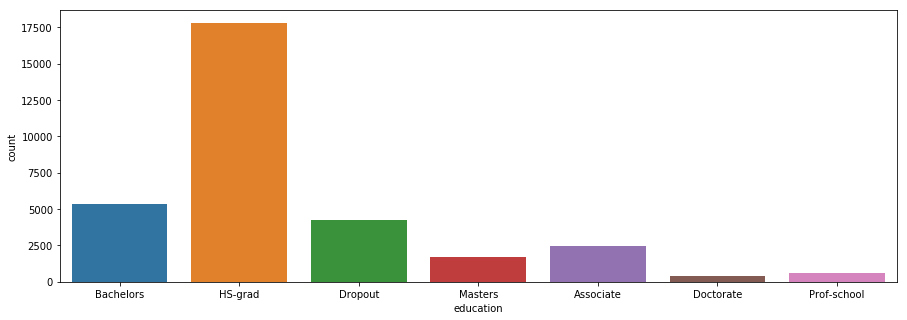

In [19]:
def feducation(x):
    if x=='Preschool' or x=='1st-4th' or x=='5th-6th' or x=='7th-8th' or x=='9th' or x=='10th' or x=='11th' or x=='12th':
        return 'Dropout'
    elif x=='Assoc-acdm' or x=='Assoc-voc':
        return 'Associate'
    elif x=='HS-grad' or x=='Some-college':
        return 'HS-grad'
    else:
        return x
df['education'] =df['education'].apply(lambda x: feducation(x))
fig = plt.figure(figsize=(15,5))
sns.color_palette('muted')
sns.countplot(df['education'])
print(df['education'].value_counts())

<h4> Marital Status </h4>

Here also, 
- 'Married-civ-spouse', 'Married-AF-spouse' and 'Married-spouse-absent' can be combined into 'Married'
- 'Separated' and 'Divorced' can be combined into 'Not Married'

Married          15417
Never-married    10683
Not Married       5468
Widowed            993
Name: marital-status, dtype: int64


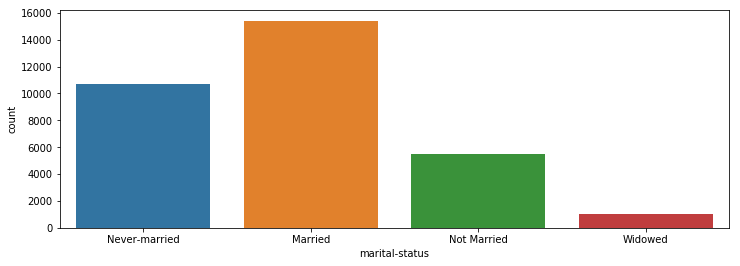

In [20]:
def fMaritalStatus(x):
    if x=='Married-civ-spouse' or x=='Married-AF-spouse' or x=='Married-spouse-absent':
        return 'Married'
    elif x=='Separated' or x=='Divorced':
        return 'Not Married'
    else:
        return x

df['marital-status']=df['marital-status'].apply(lambda x: fMaritalStatus(x))

fig = plt.figure(figsize=(12,4))
sns.color_palette('muted')
sns.countplot(df['marital-status'])
print(df['marital-status'].value_counts())

<h4> Occupation </h4>

We can combine:
- 'Craft-repair', 'Farming-fishing', 'Handlers-cleaners','Transport-moving','Machine-op-inspct' as 'Workers'
- 'Exec-managerial' as Management
- 'Other-service','Protective-serv', 'Priv-house-serv','Tech-support' as 'Service'
- 'Adm-clerical' - 'Administrative'

Worker            10062
Prof-specialty     5983
Services           5021
Management         4066
Administrative     3770
Sales              3650
Armed-Forces          9
Name: occupation, dtype: int64


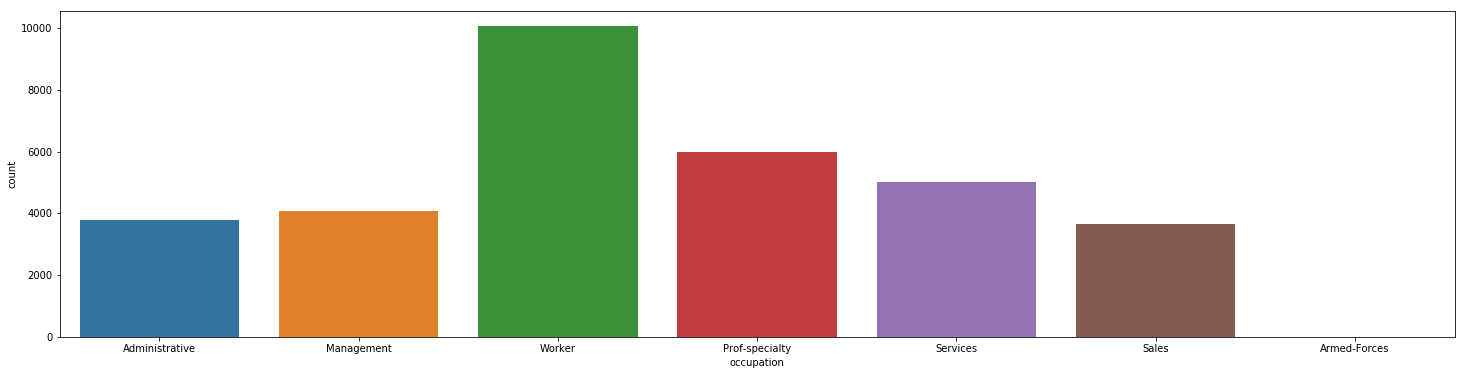

In [21]:
def fOccupation(x):
    if x== 'Craft-repair' or x== 'Farming-fishing' or x== 'Handlers-cleaners' or x=='Transport-moving' or x=='Machine-op-inspct':
        return 'Worker'
    elif x=='Exec-managerial':
        return 'Management'
    elif x== 'Other-service' or x=='Protective-serv' or x=='Priv-house-serv' or x=='Tech-support':
        return 'Services'
    elif x=='Adm-clerical':
        return 'Administrative'
    else:
        return x

df['occupation'] = df['occupation'].apply(lambda x: fOccupation(x))

fig = plt.figure(figsize=(25,6))
sns.color_palette('muted')
sns.countplot(df['occupation'])
print(df['occupation'].value_counts())

Husband           13193
Not-in-family      8305
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: relationship, dtype: int64


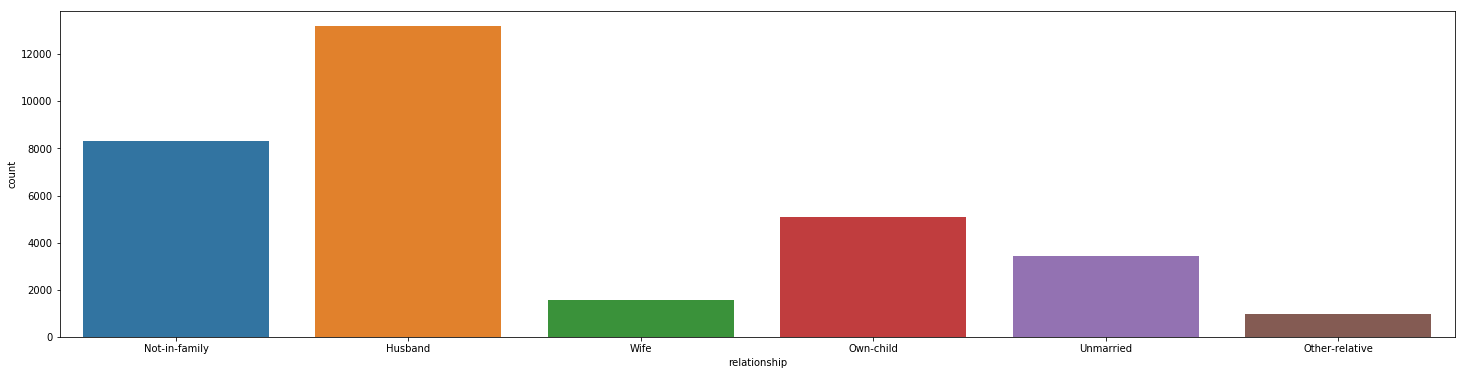

In [22]:
fig = plt.figure(figsize=(25,6))
sns.color_palette('muted')
sns.countplot(df['relationship'])
print(df['relationship'].value_counts())

<h4> Native Country </h4>
This attribute is dominated by United-States. Hence, we can look at putting up region as an additional variable.
- United-States, Outlying-US(Guam-USVI-etc): United-States
- Mexico, El Salvador,Nicaragua,Peru, Guatemala , Columbia, Ecuador, Honduras, Canada: Other-America
- Puerto-Rico,  Cuba, Jamaica, Dominican-Republic, Haiti, Trinadad&Tobago: Caribbean
- Philippines, Vietnam , Japan, China, Japan, India,Hong,Cambodia, Laos, Thailand, Taiwan, Iran : Asian
- Germany, England, Italy, Poland, Portugal, France, Greece, Ireland, Yugoslavia,Hungary, Scotland,Holand-Netherlands: Europe 

United-States-Canada    29888
Other-Americas           1058
Asia                      671
Europe                    521
Caribbean                 423
Name: native-country, dtype: int64


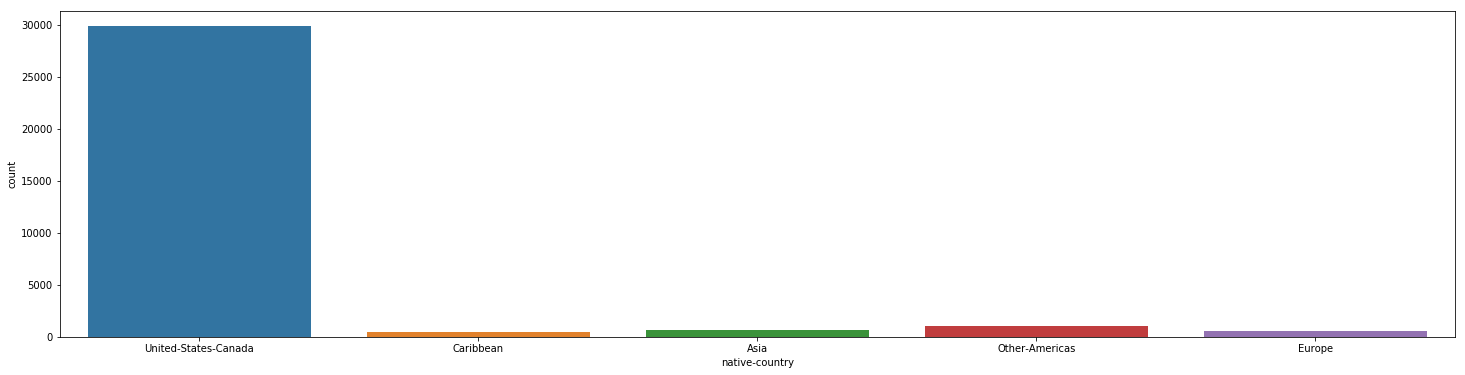

In [23]:
def fCountry(x):
    if x in ['United-States','Outlying-US(Guam-USVI-etc)','Canada']:
        return 'United-States-Canada'
    elif x in ['Mexico', 'El-Salvador','Nicaragua','Peru', 'Guatemala' , 'Columbia', 'Ecuador', 'Honduras','South']:
        return 'Other-Americas'
    elif x in ['Puerto-Rico',  'Cuba', 'Jamaica', 'Dominican-Republic', 'Haiti', 'Trinadad&Tobago']:
        return 'Caribbean'
    elif x in ['Philippines', 'Vietnam' , 'Japan', 'China', 'Japan', 'India','Hong','Cambodia', 'Laos', 'Thailand', 'Taiwan', 'Iran']:
        return 'Asia'
    elif x in ['Germany', 'England', 'Italy', 'Poland', 'Portugal', 'France', 'Greece', 'Ireland', 'Yugoslavia','Hungary', 'Scotland','Holand-Netherlands']:
        return 'Europe'
    else:
        return x
df['native-country'] = df['native-country'].apply(lambda x: fCountry(x))
fig = plt.figure(figsize=(25,6))
sns.color_palette('muted')
sns.countplot(df['native-country'])
print(df['native-country'].value_counts())

<h4> Race </h4>

Here we just change to a meaningful name

In [ ]:
def fRace(x):
    if x=='Asian-Pac-Islander':
        return 'Asian'
    elif x=='Amer-Indian-Eskimo':
        return 'American-Indian'
    else:
        return x
df['race'] =df['race'].apply(lambda x: fRace(x))
fig = plt.figure(figsize=(12,4))
sns.color_palette('muted')
sns.countplot(df['race'])
print(df['race'].value_counts())

<h4> Income </h4>

Income has two values in string format. Converting them to 0/1 format. 

<=50K    24720
>50K      7841
Name: income, dtype: int64
0    24720
1     7841
Name: target-income-gt50k, dtype: int64


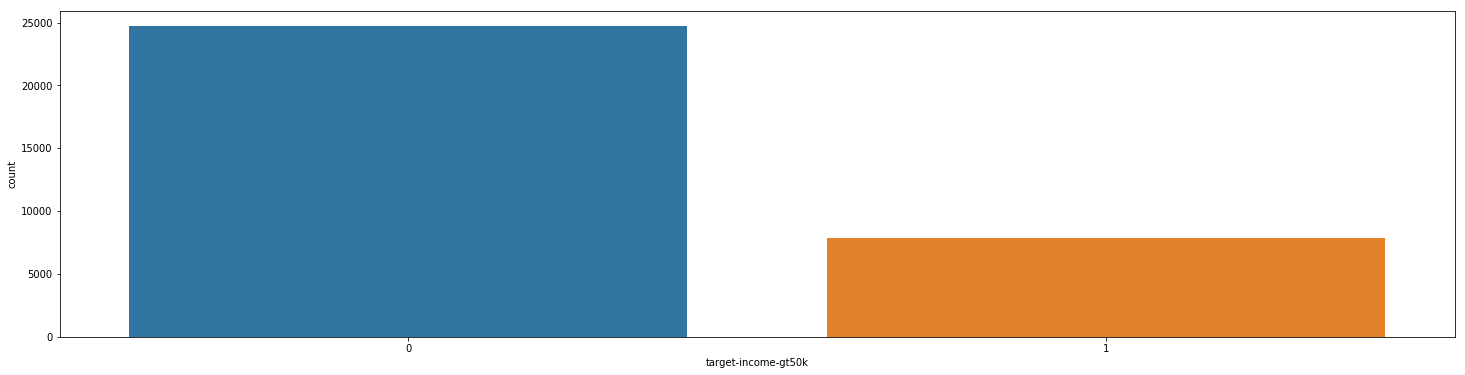

In [24]:
print(df['income'].value_counts())
df['target-income-gt50k'] = df['income'].apply(lambda x: 1 if x== '>50K' else 0)
fig = plt.figure(figsize=(25,6))
sns.color_palette('muted')
sns.countplot(df['target-income-gt50k'])
print(df['target-income-gt50k'].value_counts())

In [25]:
df.drop(['fnlwgt','education-num','income'],axis=1, inplace=True)

In [26]:
catenc = ce.BinaryEncoder(cols=['workclass','education','marital-status','occupation','relationship','race','sex', 'native-country'])
df1 = catenc.fit_transform(df)

In [27]:
X = df1.iloc[:,0:32]
y = df1.loc[:,'target-income-gt50k']
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

def ComputeAccuracy(m):
    return np.round((m[0,0]+m[1,1])/m.sum(),2)*100

<h4> !!! Now data preparation is over . Modelling begins !!! </h4>

<h2> Logistic Regression </h2>

In [30]:
logModel = LogisticRegression(random_state=100)
logModel.fit(X_train, y_train)
print(logModel.predict(X_train))

C:\Users\AmitG\AppData\Local\conda\conda\envs\PY35\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[0 0 0 ... 1 0 0]


In [31]:
logM_confMatrix = confusion_matrix(y_pred=logModel.predict(X_train),y_true=y_train)
print(classification_report(y_pred=logModel.predict(X_train),y_true=y_train))
print("Training Set Accuracy = "+ str(ComputeAccuracy(logM_confMatrix)))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90     19812
           1       0.72      0.52      0.60      6236

   micro avg       0.84      0.84      0.84     26048
   macro avg       0.79      0.73      0.75     26048
weighted avg       0.83      0.84      0.83     26048

Training Set Accuracy = 84.0


In [32]:
pred = logModel.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_score =pred,y_true=y_test)
logM_confMatrix_test = confusion_matrix(y_pred=pred,y_true=y_test)
print(classification_report(y_pred=pred,y_true=y_test))
print("Test Set Accuracy = "+ str(ComputeAccuracy(logM_confMatrix_test)))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90      4908
           1       0.74      0.52      0.61      1605

   micro avg       0.84      0.84      0.84      6513
   macro avg       0.80      0.73      0.75      6513
weighted avg       0.83      0.84      0.83      6513

Test Set Accuracy = 84.0


In [33]:
fpr, tpr, thresholds = roc_curve(y_score = pred,y_true=y_test)

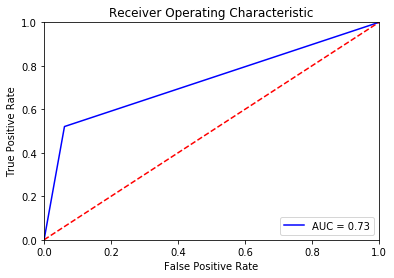

In [34]:
roc_auc = auc(fpr, tpr)

# method I: plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

<h2> Decision Tree </h2>

In [35]:
DecTree = DecisionTreeClassifier()
DecTree.fit(X_train,y_train)
confm_train = confusion_matrix(y_pred=DecTree.predict(X_train),y_true=y_train)
print(classification_report(y_pred=DecTree.predict(X_train),y_true=y_train))
print("Train Set Accuracy = "+ str(ComputeAccuracy(confm_train)))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96     19812
           1       0.93      0.78      0.85      6236

   micro avg       0.94      0.94      0.94     26048
   macro avg       0.94      0.88      0.91     26048
weighted avg       0.94      0.94      0.93     26048

Train Set Accuracy = 94.0


In [36]:
pred = DecTree.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_score =pred,y_true=y_test)
confm_test = confusion_matrix(y_pred=pred,y_true=y_test)
print(classification_report(y_pred=pred,y_true=y_test))
print("Test Set Accuracy = "+ str(ComputeAccuracy(confm_test)))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89      4908
           1       0.68      0.60      0.63      1605

   micro avg       0.83      0.83      0.83      6513
   macro avg       0.77      0.75      0.76      6513
weighted avg       0.82      0.83      0.83      6513

Test Set Accuracy = 83.0


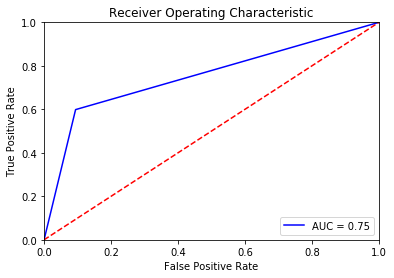

In [37]:
roc_auc = auc(fpr, tpr)

# method I: plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

<h2> Random Forest </h2>

In [38]:
RFModel = RandomForestClassifier()
RFModel.fit(X_train,y_train)
confm_train = confusion_matrix(y_pred=RFModel.predict(X_train),y_true=y_train)
print(classification_report(y_pred=RFModel.predict(X_train),y_true=y_train))
print("Train Set Accuracy = "+ str(ComputeAccuracy(confm_train)))

C:\Users\AmitG\AppData\Local\conda\conda\envs\PY35\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


              precision    recall  f1-score   support

           0       0.94      0.97      0.95     19812
           1       0.90      0.79      0.84      6236

   micro avg       0.93      0.93      0.93     26048
   macro avg       0.92      0.88      0.90     26048
weighted avg       0.93      0.93      0.93     26048

Train Set Accuracy = 93.0


In [39]:
pred = RFModel.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_score =pred,y_true=y_test)
confm_test1 = confusion_matrix(y_pred=pred,y_true=y_test)
print(classification_report(y_pred=pred,y_true=y_test))
print("Test Set Accuracy = "+ str(ComputeAccuracy(confm_test1)))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90      4908
           1       0.72      0.60      0.65      1605

   micro avg       0.84      0.84      0.84      6513
   macro avg       0.80      0.76      0.78      6513
weighted avg       0.84      0.84      0.84      6513

Test Set Accuracy = 84.0


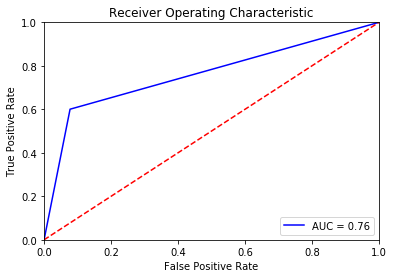

In [40]:
roc_auc = auc(fpr, tpr)

# method I: plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

<h2> Support Vector Classifier </h2>

In [41]:
C = 1.0  # SVM regularization parameter
SVCModel = LinearSVC(C=1,max_iter=50)
SVCModel.fit(X_train, y_train)
confm_train = confusion_matrix(y_pred=SVCModel.predict(X_train),y_true=y_train)
print(classification_report(y_pred=SVCModel.predict(X_train),y_true=y_train))
print("Train Set Accuracy = "+ str(ComputeAccuracy(confm_train)))

              precision    recall  f1-score   support

           0       0.98      0.49      0.65     19812
           1       0.37      0.97      0.54      6236

   micro avg       0.60      0.60      0.60     26048
   macro avg       0.68      0.73      0.60     26048
weighted avg       0.84      0.60      0.63     26048

Train Set Accuracy = 60.0


C:\Users\AmitG\AppData\Local\conda\conda\envs\PY35\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [42]:
pred = SVCModel.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_score =pred,y_true=y_test)
confm_test1 = confusion_matrix(y_pred=pred,y_true=y_test)
print(classification_report(y_pred=pred,y_true=y_test))
print("Test Set Accuracy = "+ str(ComputeAccuracy(confm_test1)))

              precision    recall  f1-score   support

           0       0.98      0.48      0.65      4908
           1       0.38      0.97      0.55      1605

   micro avg       0.60      0.60      0.60      6513
   macro avg       0.68      0.73      0.60      6513
weighted avg       0.83      0.60      0.62      6513

Test Set Accuracy = 60.0


In [43]:
SVCModel2 = SVC(kernel='rbf',C=1,gamma=0.7)
SVCModel2.fit(X_train, y_train)
confm_train = confusion_matrix(y_pred=SVCModel2.predict(X_train),y_true=y_train)
print(classification_report(y_pred=SVCModel2.predict(X_train),y_true=y_train))
print("Train Set Accuracy = "+ str(ComputeAccuracy(confm_train)))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95     19812
           1       0.90      0.74      0.81      6236

   micro avg       0.92      0.92      0.92     26048
   macro avg       0.91      0.85      0.88     26048
weighted avg       0.92      0.92      0.91     26048

Train Set Accuracy = 92.0


In [44]:
pred = SVCModel2.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_score =pred,y_true=y_test)
confm_test1 = confusion_matrix(y_pred=pred,y_true=y_test)
print(classification_report(y_pred=pred,y_true=y_test))
print("Test Set Accuracy = "+ str(ComputeAccuracy(confm_test1)))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4908
           1       0.75      0.43      0.55      1605

   micro avg       0.82      0.82      0.82      6513
   macro avg       0.79      0.69      0.72      6513
weighted avg       0.81      0.82      0.81      6513

Test Set Accuracy = 82.0


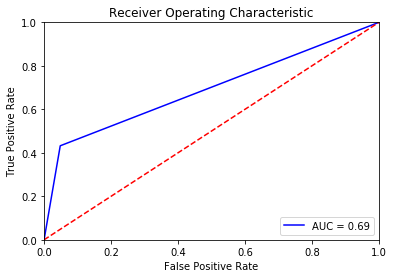

In [45]:
roc_auc = auc(fpr, tpr)

# method I: plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

<h2> Naive Bayes Classifier </h2>

In [46]:
NBModel = GaussianNB()
NBModel.fit(X_train, y_train)
confm_train = confusion_matrix(y_pred=NBModel.predict(X_train),y_true=y_train)
print(classification_report(y_pred=NBModel.predict(X_train),y_true=y_train))
print("Train Set Accuracy = "+ str(ComputeAccuracy(confm_train)))

              precision    recall  f1-score   support

           0       0.90      0.83      0.86     19812
           1       0.56      0.69      0.62      6236

   micro avg       0.80      0.80      0.80     26048
   macro avg       0.73      0.76      0.74     26048
weighted avg       0.82      0.80      0.81     26048

Train Set Accuracy = 80.0


In [47]:
pred = NBModel.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_score =pred,y_true=y_test)
confm_test1 = confusion_matrix(y_pred=pred,y_true=y_test)
print(classification_report(y_pred=pred,y_true=y_test))
print("Test Set Accuracy = "+ str(ComputeAccuracy(confm_test1)))

              precision    recall  f1-score   support

           0       0.89      0.84      0.86      4908
           1       0.58      0.70      0.63      1605

   micro avg       0.80      0.80      0.80      6513
   macro avg       0.74      0.77      0.75      6513
weighted avg       0.82      0.80      0.81      6513

Test Set Accuracy = 80.0


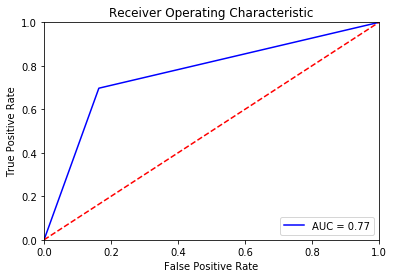

In [48]:
roc_auc = auc(fpr, tpr)

# method I: plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

<h2> XGBoost Classifier </h2>

In [49]:
dtrain = xgb.DMatrix(data=X_train,label=y_train)

param = {'max_depth': 5, 'eta': 1, 'silent': 1, 'objective': 'binary:logistic'}
         #'nthread':4,'eval_metric':'auc'}

num_round = 10
bst = xgb.train(param, dtrain, num_round)

In [50]:
tr_pred = bst.predict(dtrain)
pred = np.round(tr_pred)
print(pred)

[0. 0. 1. ... 1. 0. 0.]


In [51]:
confm_train = confusion_matrix(y_pred=pred,y_true=y_train)
print(classification_report(y_pred=pred,y_true=y_train))
print("Train Set Accuracy = "+ str(ComputeAccuracy(confm_train)))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92     19812
           1       0.80      0.62      0.70      6236

   micro avg       0.87      0.87      0.87     26048
   macro avg       0.84      0.78      0.81     26048
weighted avg       0.87      0.87      0.86     26048

Train Set Accuracy = 87.0


In [52]:
test_pred = np.round(bst.predict(xgb.DMatrix(X_test)))
fpr, tpr, thresholds = roc_curve(y_score =test_pred,y_true=y_test)
confm_test1 = confusion_matrix(y_pred=test_pred,y_true=y_test)
print(classification_report(y_pred=test_pred,y_true=y_test))
print("Test Set Accuracy = "+ str(ComputeAccuracy(confm_test1)))

              precision    recall  f1-score   support

           0       0.88      0.95      0.92      4908
           1       0.81      0.61      0.70      1605

   micro avg       0.87      0.87      0.87      6513
   macro avg       0.84      0.78      0.81      6513
weighted avg       0.86      0.87      0.86      6513

Test Set Accuracy = 87.0


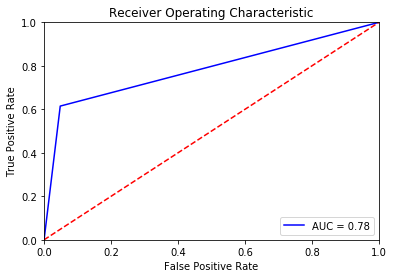

In [53]:
roc_auc = auc(fpr, tpr)

# method I: plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

<h1> Conclusion </h1>

While a number of models were tried, XGBoost turned out to be the best with the highest % accuracy on the test set. Random Forest and Decision Trees gave better accuracy on Training set, however the test set accuracies were quite low.